In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import matplotlib.pyplot as plt
import h5py
import numpy as np
import get_xyz
import constants
from pathlib import Path

In [2]:
run = 65

In [19]:
# load powder
with h5py.File(Path(constants.work) / f'powder/powder_run{run:>04}.h5', 'r') as f:
    powder = np.clip(f['data'][()], 0, None)

# Load whitefield
with h5py.File(Path(constants.work) / f'whitefield/whitefield_run{run:>04}.h5', 'r') as f:
    whitefield = np.clip(f['whitefield'][()], 0, None)

# scale whitefield to powder
c = np.sum(powder * whitefield) / np.sum(whitefield**2)
whitefield *= c
whitefield[whitefield==0] = 1

# normalise powder
powder = np.clip((powder - whitefield) / whitefield**0.5, 0, None)

# load streaks
with h5py.File(Path(constants.work) / f'streaks/streaks_run{run:>04}.h5') as f:
    streaks = f['fs0_ss0_fs1_ss1_im'][()]

In [24]:
powder_im, centre = get_xyz.geom_cor(powder)

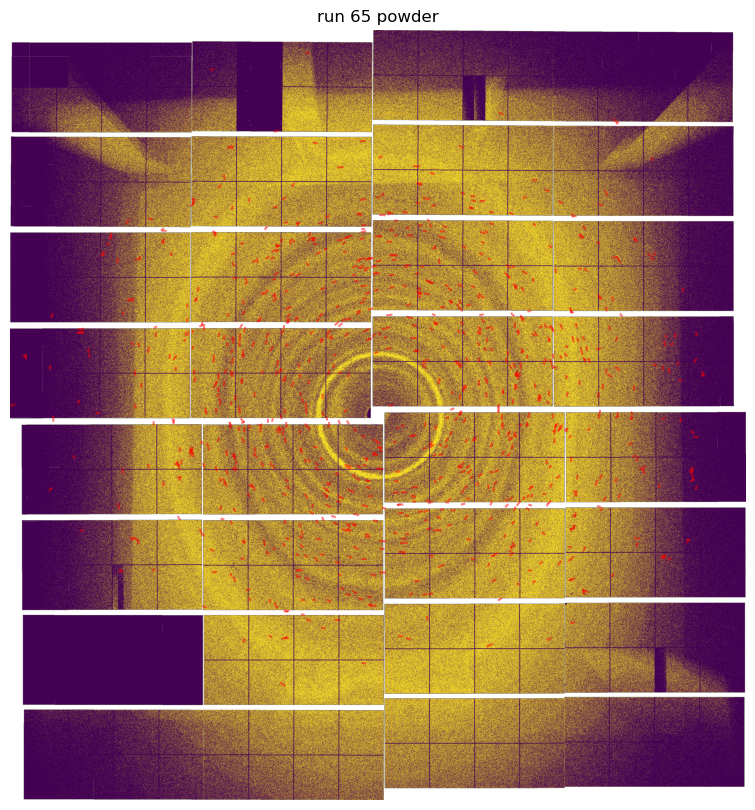

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.imshow(powder_im[::-1, ::-1]**0.2, aspect='equal', origin='upper', vmin=0, vmax=1e-2)

# plot 1000 streaks
for s in streaks[:1000]:
    ax.plot(s[::2]-centre[0], s[1::2]-centre[1], c='red', alpha=0.5)

ax.set_axis_off()
ax.set_title(f'run {run} powder')
plt.show()